# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
#Librerias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
#1

#Carga de imagenes
TRAIN_PATH= os.getcwd() + "/Prof/seg_train"
TEST_PATH= os.getcwd() + "/Prof/seg_test"

In [3]:
#Determinamos tamanio de imagenes y etiquetas de clases
class_names = ['mountain','street','glacier', 'buildings','sea','forest']
IMAGE_SIZE = (32,32)

In [4]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [5]:
#Recorremos carpetas, etiquetamos con las etiquetas de carpeta y hacemos reshape
def read_data(path, im_size, class_names_label):
   X = []
   y = []

   for folder in os.listdir(path):
       label = class_names_label[folder]
       folder_path = os.path.join(path,folder)
       # Iterar sobre todo lo que haya en path
       for file in os.listdir(folder_path):
           image_path = os.path.join(folder_path,file)
           image = cv2.imread(image_path)
           image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
           image = cv2.resize(image, im_size)
           X.append(image)
           y.append(label)


   return np.array(X), np.array(y)


X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [6]:
#Como las imagenes estan en orden hacemos shuffle en train
X_train,y_train=shuffle(X_train,y_train,random_state=42)

sea


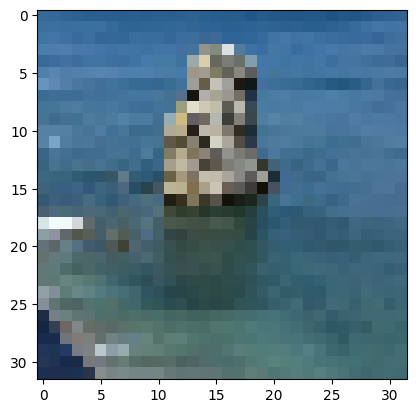

In [14]:
#2

#Investigamos algunas imagenes
index=np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [8]:
#3

#Hacemos el escalado

X_train_scal=X_train/255.0
X_test_scal=X_test/255.0

In [ ]:
#4

#